In [23]:
# Importando bibliotecas usuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importando bibliotecas para treino do modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
##from imblearn.pipeline import Pipeline as ImbPipeline
#Lendo novo Dataset
new_df = pd.read_csv('dataset_delegacias')

In [24]:
#verificando os tipos de dados
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   orgao_responsavel      5000 non-null   object
 1   ano                    5000 non-null   int64 
 2   mes                    5000 non-null   int64 
 3   dia                    5000 non-null   int64 
 4   dia_semana             5000 non-null   int64 
 5   dia_semana_name        5000 non-null   object
 6   tipo_crime             5000 non-null   object
 7   quantidade_ocorrencia  5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None


In [26]:
# Transformando colunas categóricas em numéricas
colunas_categoricas = ['orgao_responsavel', 'dia_semana', 'dia_semana_name', 'tipo_crime']
colunas_pre_encoded = OneHotEncoder(drop='first', sparse_output=False)
colunas_encoded = colunas_pre_encoded.fit_transform(new_df[['orgao_responsavel', 'dia_semana', 'dia_semana_name', 'tipo_crime']])
#Resgatando nomes das colunas que vão passar por hot encoding
feature_names = colunas_pre_encoded.get_feature_names_out(colunas_categoricas)
#Criando DataFrame com as colunas transformadas
df_encoded = pd.DataFrame(colunas_encoded, columns=feature_names)
df_encoded['ano'] = new_df['ano']
df_encoded['mes'] = new_df['mes']
df_encoded['dia'] = new_df['dia']
df_encoded['quantidade_ocorrencia'] = new_df['quantidade_ocorrencia']
df_encoded['tipo_crime'] = new_df['tipo_crime']
df_encoded = df_encoded.drop(columns=['tipo_crime'])
df_encoded.head()



,orgao_responsavel_Delegacia Boa Viagem,orgao_responsavel_Delegacia Casa Forte,orgao_responsavel_Delegacia Pina,orgao_responsavel_Delegacia Santo Amaro,orgao_responsavel_Delegacia Torre,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,...,tipo_crime_Homicídio,tipo_crime_Latrocínio,tipo_crime_Roubo,tipo_crime_Sequestro,tipo_crime_Tráfico de Drogas,tipo_crime_Violência Doméstica,ano,mes,dia,quantidade_ocorrencia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2024,8,2,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2022,10,29,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023,3,12,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,4,18,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,6,30,1


In [35]:
# Dividindo os dados em treino e teste
X = df_encoded[['orgao_responsavel_Delegacia Boa Viagem', 'orgao_responsavel_Delegacia Casa Forte', 'orgao_responsavel_Delegacia Pina', 'orgao_responsavel_Delegacia Santo Amaro', 'orgao_responsavel_Delegacia Torre', 'tipo_crime_Furto', 'tipo_crime_Homicídio', 'tipo_crime_Latrocínio', 'tipo_crime_Roubo', 'tipo_crime_Sequestro', 'tipo_crime_Tráfico de Drogas', 'tipo_crime_Violência Doméstica', 'ano' ]]
y = df_encoded['quantidade_ocorrencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho treino:", len(X_train))
print("Tamanho teste:", len(X_test))
print('Tamanho treino', len(y_train))
print("Tamanho teste:", len(y_test))

Tamanho treino: 3500
Tamanho teste: 1500
Tamanho treino 3500
Tamanho teste: 1500


In [36]:
# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficiente (inclinação):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)

Coeficiente (inclinação): -0.02188485859740519
Intercepto: 20.98372998921941


Erro Médio Absoluto (MAE): 0.15


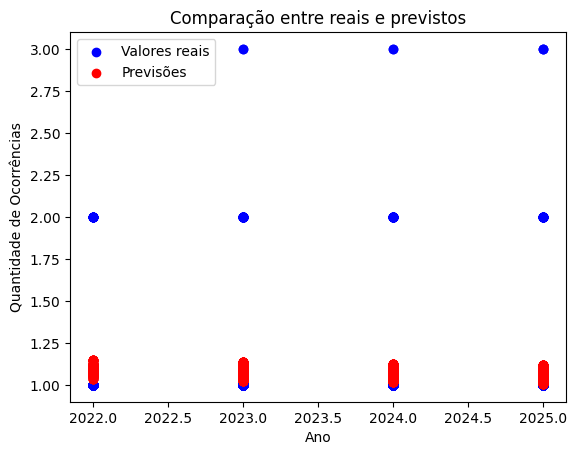

In [37]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Erro Médio Absoluto (MAE):", round(mae, 2))

# Comparando valores reais x previstos
plt.scatter(X_test['ano'], y_test, color="blue", label="Valores reais")
plt.scatter(X_test['ano'], y_pred, color="red", label="Previsões")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Ocorrências")
plt.title("Comparação entre reais e previstos")
plt.legend()
plt.show()

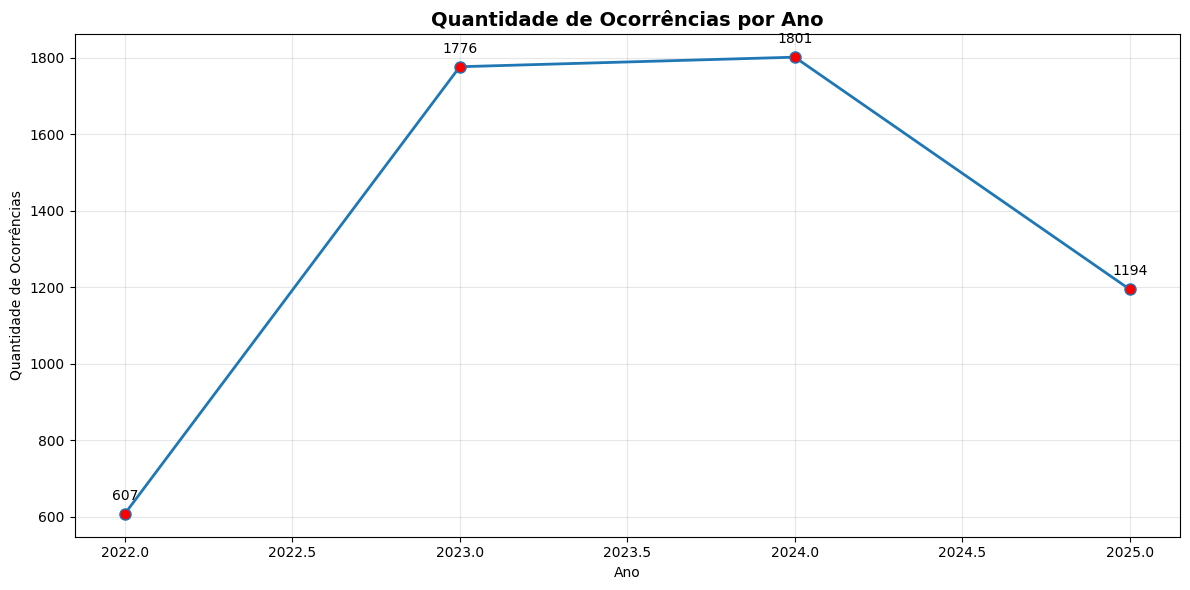

In [38]:
ocorrencias_por_ano = df_encoded.groupby('ano')['quantidade_ocorrencia'].sum().reset_index()
# Plotando gráfico de linha que mostra a quantidade de ocorrências por órgão responsável
plt.figure(figsize=(12, 6))
plt.plot(ocorrencias_por_ano['ano'], ocorrencias_por_ano['quantidade_ocorrencia'], 
         marker='o', linewidth=2, markersize=8, markerfacecolor='red')

plt.title("Quantidade de Ocorrências por Ano", fontsize=14, fontweight='bold')
plt.ylabel("Quantidade de Ocorrências")
plt.xlabel("Ano")
plt.grid(True, alpha=0.3)

# Adicionar valores nos pontos
for i, row in ocorrencias_por_ano.iterrows():
    plt.annotate(f"{row['quantidade_ocorrencia']}", 
                (row['ano'], row['quantidade_ocorrencia']),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()